In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
police_arrests_made = pd.read_csv('E:/data challenge/police-arrests-made.csv',encoding="utf-8", sep=';')
police_arrests_made=police_arrests_made.dropna()
police_arrests_made.columns

Index(['Incident Id', 'Date of Arrest', 'Time of Arrest', 'Primary Charge',
       'Address', 'Arrestee's Age', 'Arrestee's Race', 'Arrestee's Gender',
       'Arrestee's Ethnicity', 'Type of Arrest', 'Drugs or Alcohol Present',
       'Weapon Present'],
      dtype='object')

In [3]:
police_arrests_made.columns = ['Incident_Id', 'Date_of_Arrest', 'Time_of_Arrest', 'Primary_Charge',
       'Address', "Arrestee's_Age", "Arrestee_s_Race", "Arrestee's_Gende",
       "Arrestee's_Ethnicity", 'Type_of_Arrest', 'Drugs_or_Alcohol_Present',
       'Weapon_Present']
#keep primary charge type >=100
police_arrests_made=police_arrests_made.groupby(police_arrests_made.iloc[:,3]).filter(lambda x: len(x)>=100)


In [4]:
def H(row):
   if row["Arrestee's_Ethnicity"] == 'H' :
      return 1
   return 0

police_arrests_made['Hispanico'] = police_arrests_made.apply (lambda row: H(row), axis=1)

def N(row):
   if row["Arrestee's_Ethnicity"] == 'N' :
      return 1
   return 0

police_arrests_made['None'] = police_arrests_made.apply (lambda row: N(row), axis=1)

def U(row):
   if row["Arrestee's_Ethnicity"] == 'U' :
      return 1
   return 0

police_arrests_made['Unknown'] = police_arrests_made.apply (lambda row: U(row), axis=1)

police_arrests_made = police_arrests_made.drop(["Arrestee's_Ethnicity"],axis=1)


In [5]:
def White(row):
   if row["Arrestee_s_Race"] == 'W' :
      return 1
   return 0

police_arrests_made['White'] = police_arrests_made.apply (lambda row: White(row), axis=1)

def Black(row):
   if row["Arrestee_s_Race"] == 'B' :
      return 1
   return 0

police_arrests_made['Black'] = police_arrests_made.apply (lambda row: Black(row), axis=1)

def Asian(row):
   if row["Arrestee_s_Race"] == 'A' :
      return 1
   return 0

police_arrests_made['Asian'] = police_arrests_made.apply (lambda row: Asian(row), axis=1)


def White(row):
   if row["Arrestee_s_Race"] == 'W' :
      return 1
   return 0

police_arrests_made['White'] = police_arrests_made.apply (lambda row: White(row), axis=1)

def Indian(row):
   if row["Arrestee_s_Race"] == 'I' :
      return 1
   return 0

police_arrests_made['Indian'] = police_arrests_made.apply (lambda row: Indian(row), axis=1)

def Unknown(row):
   if row["Arrestee_s_Race"] == 'O' :
      return 1
   return 0

police_arrests_made['Unknown'] = police_arrests_made.apply (lambda row: Unknown(row), axis=1)

police_arrests_made = police_arrests_made.drop(["Arrestee_s_Race"],axis=1)


In [6]:
Gende_map = {'M':0, 'F':1}
Drugs_map = {'N':0, 'Y':1}
Weapon_map = {'UNARMED': 0, 'ARMED': 1}

police_arrests_made["Arrestee's_Gende"] = police_arrests_made["Arrestee's_Gende"].map(Gende_map)
police_arrests_made['Drugs_or_Alcohol_Present'] = police_arrests_made['Drugs_or_Alcohol_Present'].map(Drugs_map)
police_arrests_made['Weapon_Present'] = police_arrests_made['Weapon_Present'].map(Weapon_map)

In [7]:
police_arrests_made = police_arrests_made.dropna()

In [8]:

x=police_arrests_made.iloc[:,5:].drop(['Type_of_Arrest'],axis=1).values
y=police_arrests_made.iloc[:,3].values
y 

array(['IMPAIRED DRIVING DWI', 'FAIL TO APPEAR/COMPL',
       'FAIL TO APPEAR/COMPL', ..., 'FAIL TO APPEAR/COMPL',
       'IMPAIRED DRIVING DWI', 'POSSESSION MARIJUANA'], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=60)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=60, p=2,
                     weights='uniform')

In [49]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.424956369982548

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  9   3   0   2   0   0   0   2   0  24  14   0   5   1   1   0   0   0]
 [  9   3   0   1   0   0   0   0   1  21  12   0   7   1   1   0   0   0]
 [  3   0   8   0   0   0   0   0   1   9   5   0   1   0   0   0   0   1]
 [  3   0   3   1   0   0   1   0   1   7   4   0   7   0   0   0   0   1]
 [  2   3   0   1   0   0   0   0   0  10   1   1   1   0   0   0   0   0]
 [  3   1   0   1   0   0   0   0   0  11   1   0   3   0   1   0   0   0]
 [  0   0   0   0   0   0   8   0   0   1   8   1   0   2   0   0   0  13]
 [  1   2   1   0   1   1   0   0   0   5  10   0   5   1   0   0   0   3]
 [  5   0   0   0   1   0   0   1   1   6  11   0  16   0   0   0   0   0]
 [ 11  15  11   0   3   1   1   0   1 125  18   1  23   1   1   0   0   1]
 [ 14   0   6   3   2   0   5   0  11   7 133   2  20   9   0   0   0   4]
 [  4   2   2   0   1   0   0   0   0  18   3   0   5   0   0   0   0   0]
 [ 21   1   2   7   3   0   1   1   0  29  43   0  76   1   0   0   0   0]
 [  2   1   0   0   0   0

C:\Users\ymei\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
mapping = {'2ND DEGREE TRESPASS':1, 'ASSAULT ON FEMALE':2, 'ASSAULT-SIMPLE':3, 'BREAKING/ENTER-MISD': 4, 'BREAKING/LARC-FELONY': 5, 'COMMUNICATE THREATS':6, 
          'CONSUME ALCOHOLIC BEVERAGE LESS THAN 21':7, 'DRUG PARAPHERNALIA':8,'DRUNK / DISRUPTIVE':9, 'FAIL TO APPEAR/COMPL':10,'IMPAIRED DRIVING DWI':11, 'LARCENY -  ALL OTHER':12,
          'OPEN CONTAINER': 13,'POSSESSION MARIJUANA':14,  'PUBLIC CONSUMPTION':15, 'PUBLIC URINATION':16,'RESISTING ARREST':17,'UNDERAGE POSSESSION':18}

In [15]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

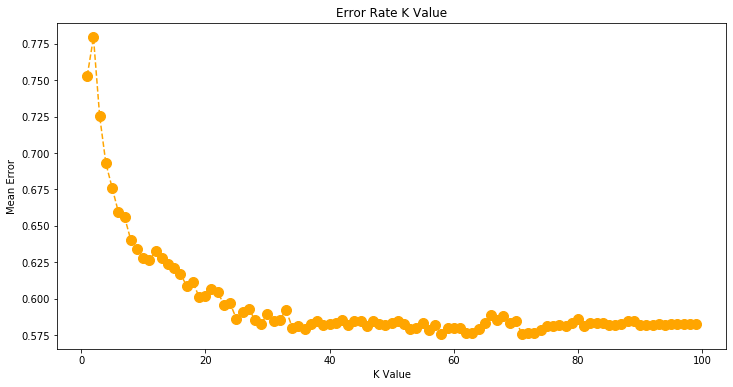

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [59]:
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions
def knn_comparison(data, k):
    x = data[["Arrestee's_Age", "Arrestee's_Gende"]].values
    y = data["Primary_Charge"].map(mapping).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2,res=0.02)
    # Adding axes annotations
    plt.xlabel("Arrestee's_Age")
    plt.ylabel("Arrestee's_Gende")
    plt.title("Knn with K="+ str(k))
    plt.figure(dpi=600)
    plt.show()



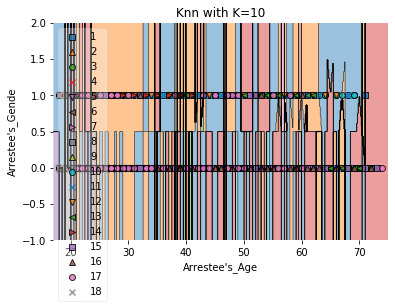

<Figure size 3600x2400 with 0 Axes>

In [60]:
knn_comparison(police_arrests_made, 10)